<a href="https://colab.research.google.com/github/itsmeharshit554/Image_classifcation_cnn/blob/main/Image_Classifier_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import os

In [4]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
len(gpus)

1

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
from google.colab.patches import cv2_imshow

In [8]:
data="/content/drive/MyDrive/training_data"
os.listdir(data)

['Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold']

In [9]:
img_ext=["jpeg","jpg","bmp","png"]
# image extentions list

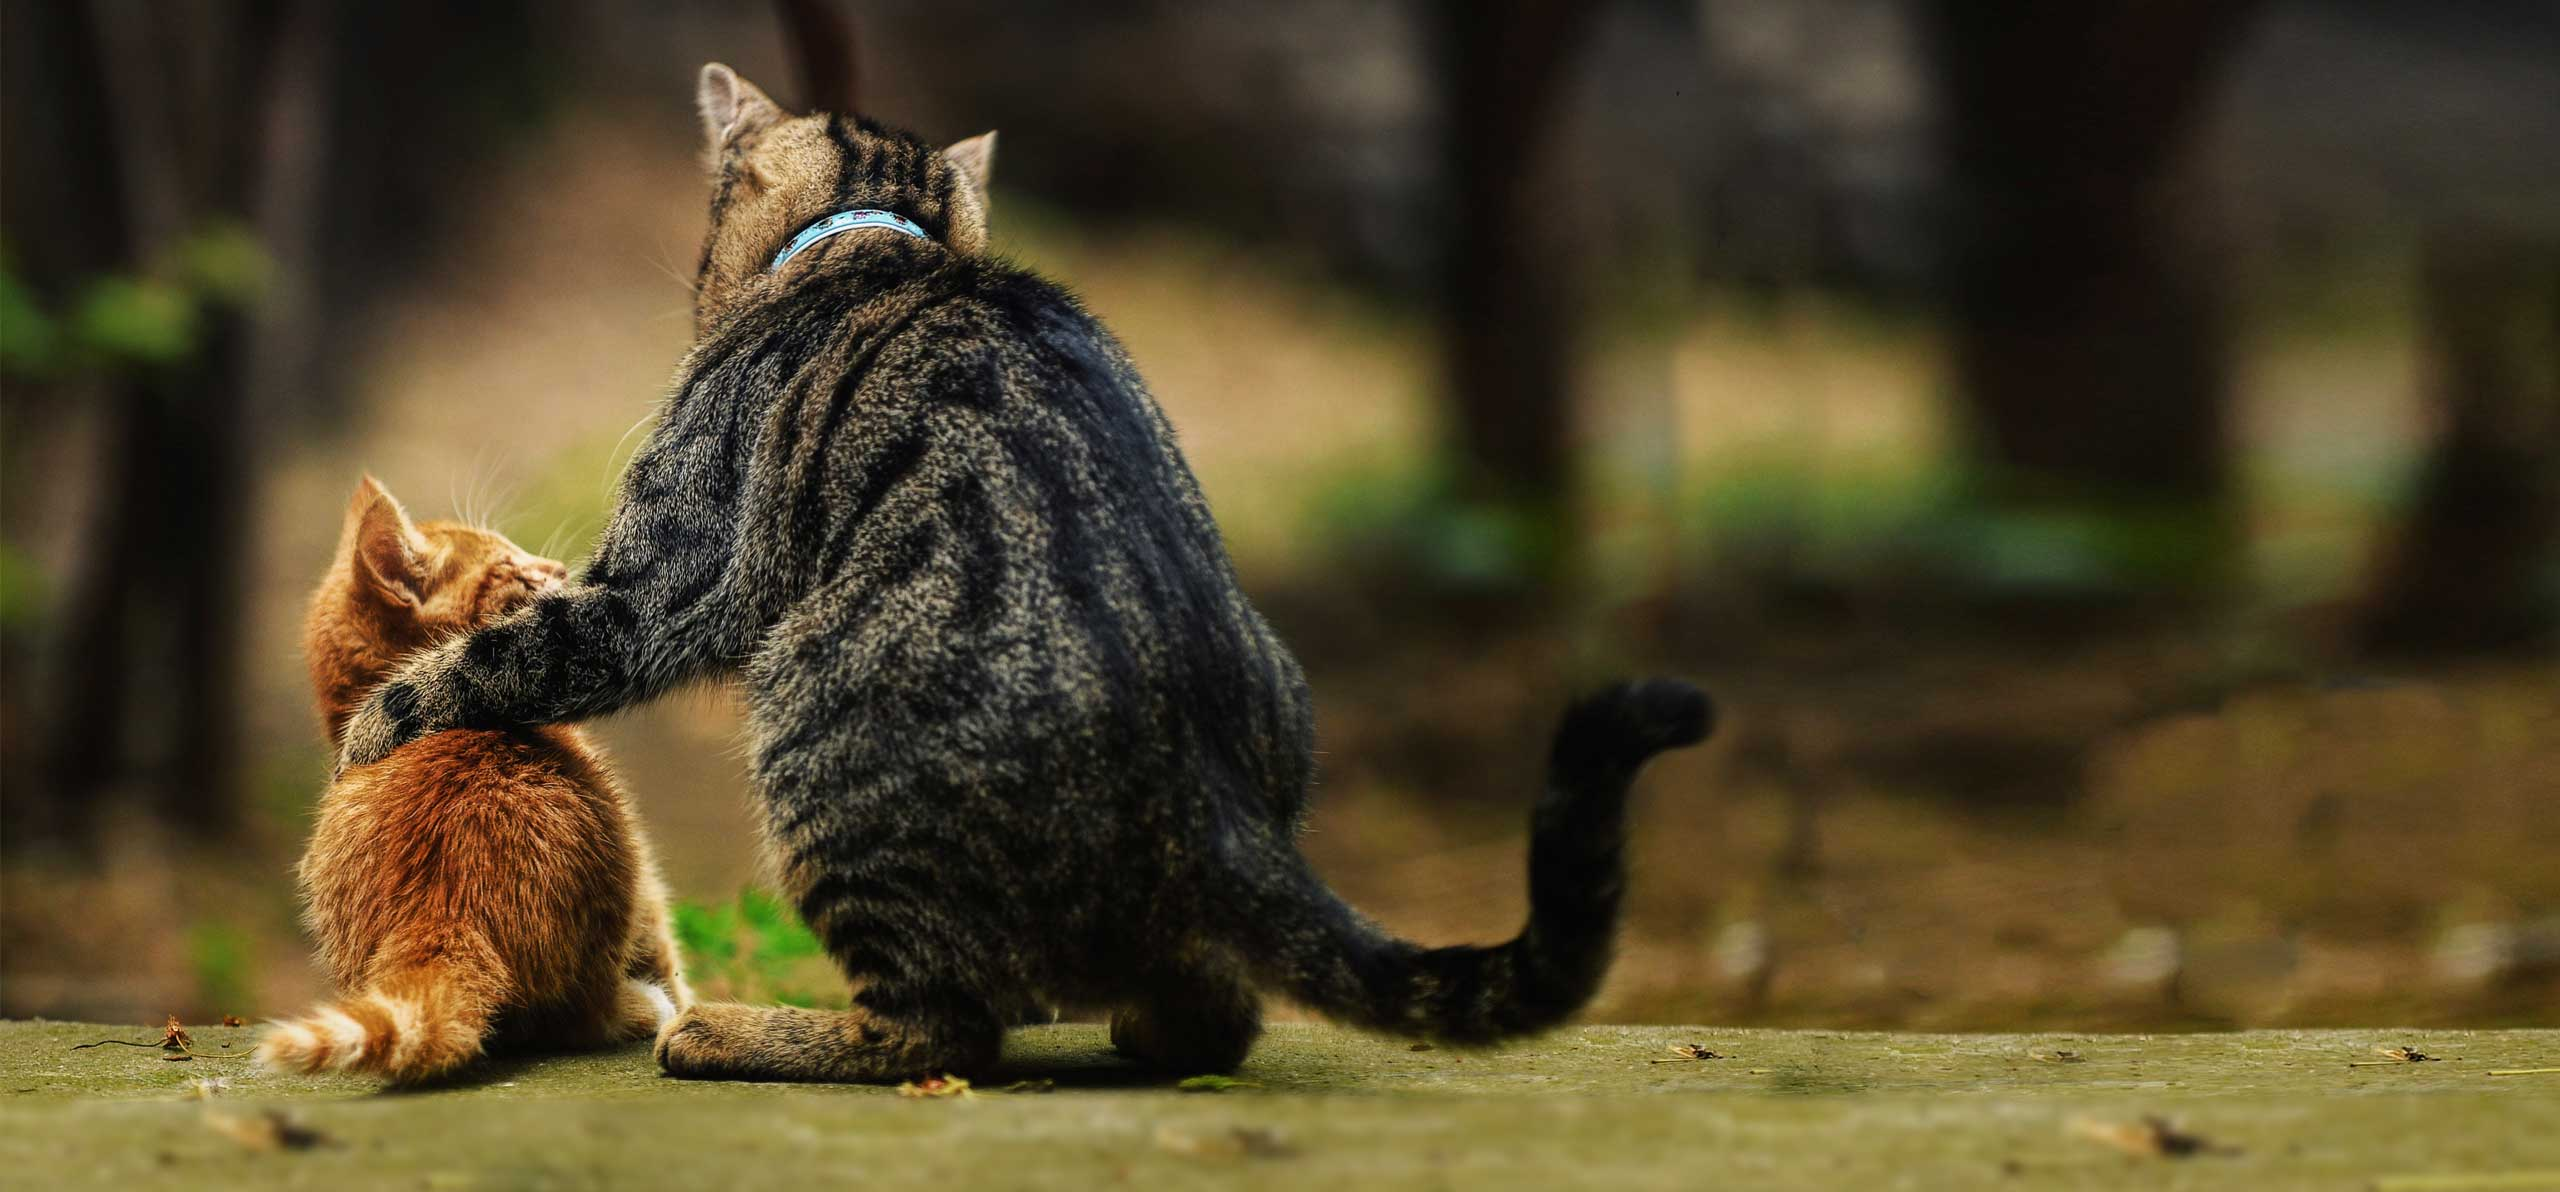

In [10]:
img=cv2.imread("/content/drive/MyDrive/data/cats/01_adding_cat_header.jpg")
cv2_imshow(img)

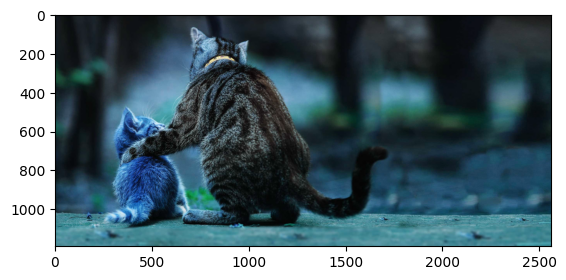

In [11]:
plt.imshow(img)
plt.show()

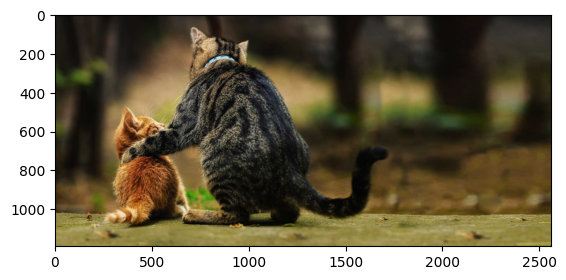

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/training_data",image_size=(228,228))

Found 15600 files belonging to 10 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()
batch

(array([[[[ 11.661666,   8.477455,  19.661665],
          [144.26823 , 138.26823 , 152.26823 ],
          [144.91489 , 138.91489 , 152.91489 ],
          ...,
          [112.99383 , 101.99383 , 117.99383 ],
          [113.01131 , 102.01131 , 118.01131 ],
          [119.32835 , 108.32835 , 124.32835 ]],
 
         [[ 11.707988,   8.523777,  19.707989],
          [145.43628 , 139.43628 , 153.43628 ],
          [148.54779 , 142.54779 , 156.54779 ],
          ...,
          [111.06925 , 100.06925 , 116.06925 ],
          [109.33101 ,  98.33101 , 114.33101 ],
          [114.52633 , 103.52633 , 119.52633 ]],
 
         [[ 11.620192,   8.435981,  19.62019 ],
          [144.25046 , 138.25046 , 152.25046 ],
          [148.69298 , 142.69298 , 156.69298 ],
          ...,
          [107.26747 ,  96.26747 , 112.26747 ],
          [103.258286,  92.258286, 108.258286],
          [107.808334,  96.808334, 112.808334]],
 
         ...,
 
         [[ 16.142944,  11.007455,  24.142944],
          [165.793

In [19]:
len(batch)
# will print the groups in which dataset is classified

2

In [20]:
batch[1]

array([8, 9, 8, 3, 3, 2, 1, 3, 1, 3, 5, 4, 8, 4, 7, 4, 7, 1, 4, 7, 9, 4,
       4, 9, 1, 1, 1, 5, 0, 1, 3, 7], dtype=int32)

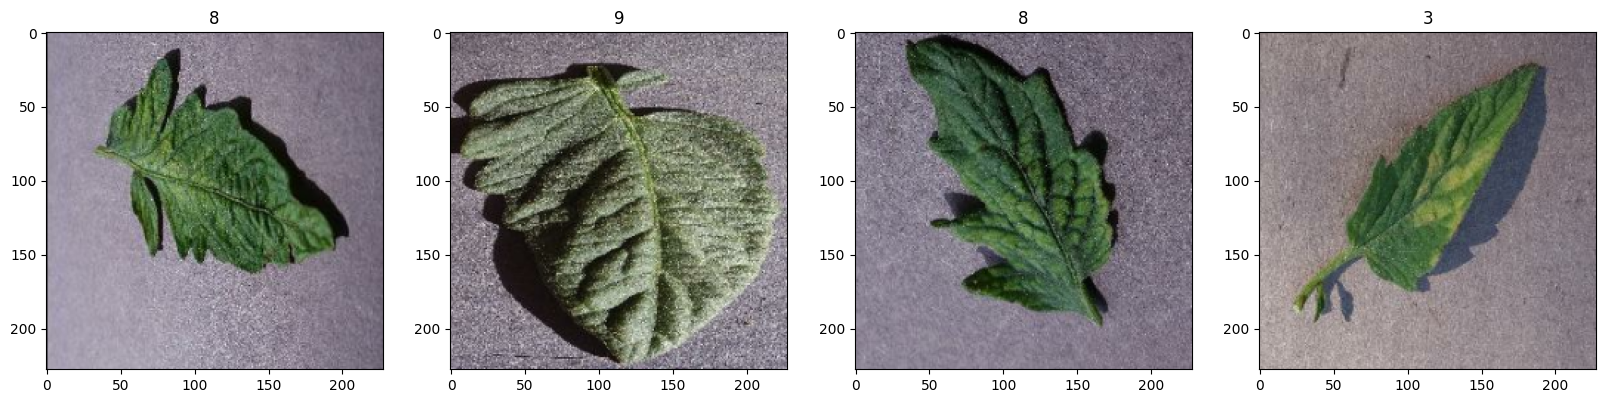

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator()


In [23]:
scaled_iterator1=scaled_iterator.next()
scaled_iterator1


(array([[[[0.48441002, 0.4491159 , 0.4216649 ],
          [0.6220746 , 0.5867805 , 0.5593295 ],
          [0.5698293 , 0.53453517, 0.5070842 ],
          ...,
          [0.12496404, 0.12496404, 0.1328072 ],
          [0.1116859 , 0.1116859 , 0.11952904],
          [0.12132785, 0.12132785, 0.12917098]],
 
         [[0.48899388, 0.4536998 , 0.42624882],
          [0.49354193, 0.45824778, 0.4307968 ],
          [0.550391  , 0.5150969 , 0.48764598],
          ...,
          [0.12644169, 0.12644169, 0.13428482],
          [0.1208598 , 0.1208598 , 0.12870294],
          [0.13157898, 0.13157898, 0.13942212]],
 
         [[0.4715523 , 0.43625823, 0.40880725],
          [0.53483605, 0.49954194, 0.47209096],
          [0.54062575, 0.50533164, 0.4778807 ],
          ...,
          [0.12799324, 0.12799324, 0.13583638],
          [0.13429658, 0.13429658, 0.14213972],
          [0.14678365, 0.14678365, 0.15462679]],
 
         ...,
 
         [[0.3943216 , 0.3943216 , 0.3943216 ],
          [0.38451

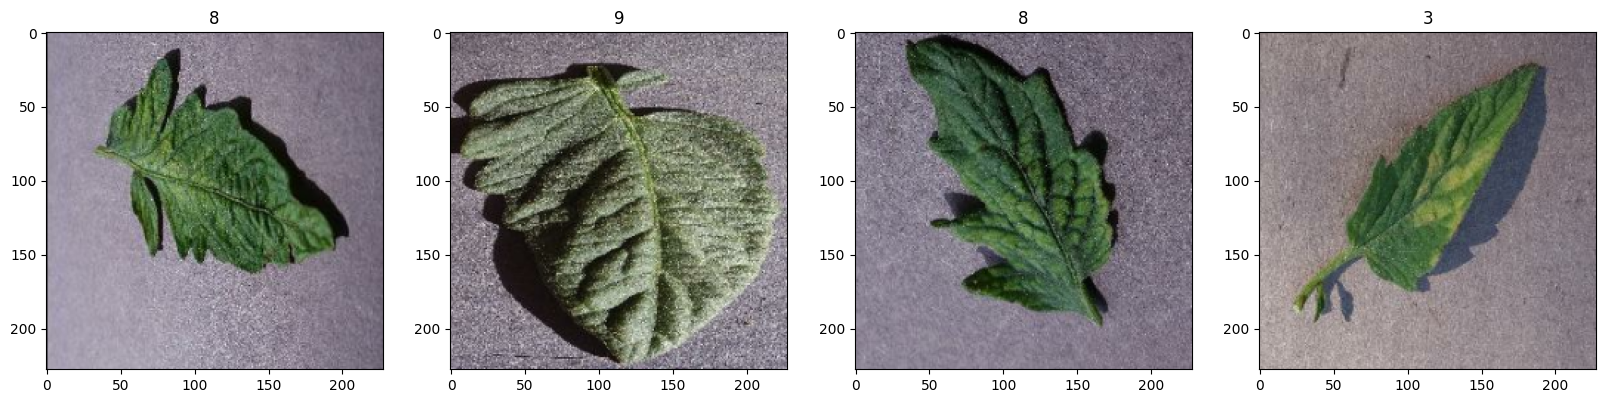

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [52]:
train_size+val_size+test_size

488

In [53]:
len(data)

488

In [55]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [57]:
model=Sequential()

In [58]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(228,228,3)))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3,3), 1, activation='relu'))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 226, 226, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 788544)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               201867520 
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                      

In [73]:
hist=model.fit(train, batch_size=128, epochs=10, validation_data=val)
# Compile it 


Epoch 1/10
341/341 [==============================] - 77s 186ms/step - loss: 1.6373 - accuracy: 0.5634 - val_loss: 1.0835 - val_accuracy: 0.6397
Epoch 2/10
341/341 [==============================] - 63s 183ms/step - loss: 0.5172 - accuracy: 0.8302 - val_loss: 0.8355 - val_accuracy: 0.7433
Epoch 3/10
341/341 [==============================] - 77s 224ms/step - loss: 0.2127 - accuracy: 0.9338 - val_loss: 0.7581 - val_accuracy: 0.7915
Epoch 4/10
341/341 [==============================] - 62s 181ms/step - loss: 0.1128 - accuracy: 0.9660 - val_loss: 1.0786 - val_accuracy: 0.7411
Epoch 5/10
341/341 [==============================] - 77s 224ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 1.1636 - val_accuracy: 0.7526
Epoch 6/10
341/341 [==============================] - 77s 225ms/step - loss: 0.0929 - accuracy: 0.9731 - val_loss: 1.2502 - val_accuracy: 0.7430
Epoch 7/10
341/341 [==============================] - 77s 225ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 1.0359 - val_ac

In [74]:
hist.history

{'loss': [1.6373106241226196,
  0.5172169208526611,
  0.21274003386497498,
  0.11280892044305801,
  0.0637708306312561,
  0.09289352595806122,
  0.03975951671600342,
  0.15086589753627777,
  0.050374653190374374,
  0.017889423295855522],
 'accuracy': [0.5634164214134216,
  0.8301869630813599,
  0.9338343143463135,
  0.9660007357597351,
  0.9804801940917969,
  0.9731488227844238,
  0.9870784282684326,
  0.9550036787986755,
  0.9849706888198853,
  0.9952346086502075],
 'val_loss': [1.0834760665893555,
  0.8354637026786804,
  0.7581323385238647,
  1.0785616636276245,
  1.1635969877243042,
  1.2501699924468994,
  1.0358810424804688,
  1.4612789154052734,
  1.1986740827560425,
  1.2179089784622192],
 'val_accuracy': [0.639668345451355,
  0.7433035969734192,
  0.7914540767669678,
  0.7410714030265808,
  0.7525510191917419,
  0.7429847121238708,
  0.7965561151504517,
  0.706632673740387,
  0.7908163070678711,
  0.7924107313156128]}

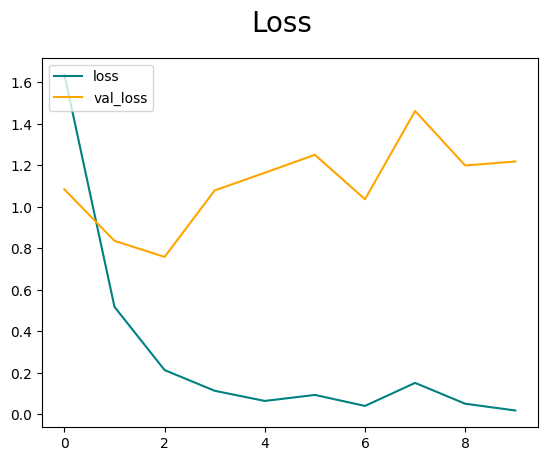

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


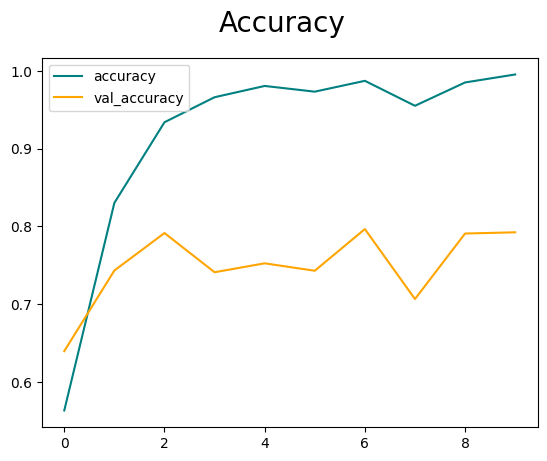

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [81]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 44ms/step


ValueError: ignored

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

In [ ]:
import cv2


In [ ]:
img2 = cv2.imread('/content/dsds.jpg')
plt.imshow(img2)
plt.show()

In [ ]:
resize = tf.image.resize(img2, (228,228))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

    # the model created before was of differenting between cat and dog which had 
    # an accuarcy of 99% but this is having accuracy of 10-11%

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save("tomato_disease_leaf_detection_cnn.h5")
cnn_model.save("tomato_disease_leaf_detection_cnn.h5") # Save model
 
# Load model
tomato_disease_leaf_detection_cnn = keras.models.load_model("tomato_disease_leaf_detection_cnn.h5")
 
Y_pred_sample = tomato_disease_leaf_detection_cnn.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]